In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

### Read the datasets

In [522]:
attribute_df = pd.read_csv('Attribute+DataSet (2).csv') #  dataset of woman's clothing
sales_df = pd.read_csv('Dress+Sales (1).csv') # dataset having sales for different seasons

## To perform the EDA, we have following steps:
1. Data cleaning
2. Univariate analysis
3. Bivariate analysis

## Data Cleaning

## 1. Check details of both datasets using .info()

In [296]:
# view first 5 rows of the data
attribute_df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [294]:
# View the information of the attribute data
attribute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


In [298]:
# view first 5 rows of the sales data
sales_df.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [302]:
# View the information of the sales data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

## 2. Sales dataset

### Handling dtypes of the dataset

In [305]:
sales_df.columns

Index(['Dress_ID', '29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013',
       '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013',
       '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013',
       '26-09-2013', '28-09-2013', '30-09-2013', '10-02-2013', '10-04-2013',
       '10-06-2013', '10-08-2013', '10-10-2013', '10-12-2013'],
      dtype='object')

In [309]:
## Changing object dtype to float dtype using pd.to_numeric
cols = ['09-12-2013', '14-09-2013','16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013']
sales_df[cols] = sales_df[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

In [311]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

### Handling the missing values 


In [313]:
## Lets check for null values in the sales data
sales_df.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      1
14-09-2013      1
16-09-2013      1
18-09-2013      1
20-09-2013      1
22-09-2013      1
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

In [315]:
## Let us find the percentage of null vales for each column
(sales_df.isnull().sum()/sales_df.shape[0])*100

Dress_ID       0.000000
29-08-2013     0.000000
31-08-2013     0.000000
09-02-2013     0.000000
09-04-2013     0.000000
09-06-2013     0.000000
09-08-2013     0.000000
09-10-2013     0.000000
09-12-2013     0.208768
14-09-2013     0.208768
16-09-2013     0.208768
18-09-2013     0.208768
20-09-2013     0.208768
22-09-2013     0.208768
24-09-2013     0.000000
26-09-2013    46.346555
28-09-2013     0.000000
30-09-2013    53.653445
10-02-2013    54.070981
10-04-2013    53.862213
10-06-2013     0.000000
10-08-2013    53.235908
10-10-2013    53.235908
10-12-2013     0.000000
dtype: float64

In [317]:
## Removing the columns with null values more than 40 percent
sales_df.drop(['26-09-2013','30-09-2013','10-02-2013','10-04-2013','10-08-2013','10-10-2013'], axis = 1, inplace = True)

In [321]:
sales_df.isnull().sum()

Dress_ID      0
29-08-2013    0
31-08-2013    0
09-02-2013    0
09-04-2013    0
09-06-2013    0
09-08-2013    0
09-10-2013    0
09-12-2013    1
14-09-2013    1
16-09-2013    1
18-09-2013    1
20-09-2013    1
22-09-2013    1
24-09-2013    0
28-09-2013    0
10-06-2013    0
10-12-2013    0
dtype: int64

## 3. Merging attribute data with sales data


In [323]:
## Merging attribute data with sales data using merge
df = pd.merge(left = attribute_df, right = sales_df, how = 'left', left_on = 'Dress_ID', right_on = 'Dress_ID')

## 4. Feature Engineering 
Summing columns and dropping irrelevent columns that are not needed for analysis here

#### Summing columns season wise

In [358]:
## Adding new columns to df with total sales for each season
def get_season(month):
    if month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    elif month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
df_sales_columns = df[['29-08-2013', '31-08-2013', '09-02-2013',
       '09-04-2013', '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013',
       '14-09-2013', '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013',
       '24-09-2013', '28-09-2013', '10-06-2013', '10-12-2013']]    

list_col = df_sales_columns.columns 
list_new_col = [ get_season(pd.to_datetime(x, format = '%d-%m-%Y').month) for x in list_col]
df_sales_columns.columns = list_new_col
df_sales_columns.columns

Index(['Summer', 'Summer', 'Winter', 'Spring', 'Summer', 'Summer', 'Autumn',
       'Winter', 'Autumn', 'Autumn', 'Autumn', 'Autumn', 'Autumn', 'Autumn',
       'Autumn', 'Summer', 'Winter'],
      dtype='object')

In [362]:
## Summing all the columns for each season to get total sales per season
df_sales_columns = df_sales_columns.copy()
df_sales_columns['Autumn_total_sales'] = df_sales_columns.loc[:,df_sales_columns.columns=='Autumn'].sum(axis = 1)

In [366]:
df_sales_columns['Summer_total_sales'] = df_sales_columns.loc[:,df_sales_columns.columns=='Summer'].sum(axis = 1)

In [368]:
df_sales_columns['Winter_total_sales'] = df_sales_columns.loc[:,df_sales_columns.columns=='Winter'].sum(axis = 1)
df_sales_columns['Spring_total_sales'] = df_sales_columns.loc[:,df_sales_columns.columns=='Spring'].sum(axis = 1)

In [378]:
## Concatenate df_sales_columns with df using pd.concat
df = pd.concat([df,df_sales_columns[['Autumn_total_sales',
       'Summer_total_sales', 'Winter_total_sales', 'Spring_total_sales']]], axis = 1)


#### Dropping columns with same information

In [447]:
df.drop(['29-08-2013', '31-08-2013', '09-02-2013',
       '09-04-2013', '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013',
       '14-09-2013', '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013',
       '24-09-2013', '28-09-2013', '10-06-2013', '10-12-2013'], axis = 1, inplace = True)

## 5. Handling missing values column-wise

In [455]:
df.isnull().sum()

Dress_ID                0
Style                   0
Price                   2
Rating                  0
Size                    0
Season                  2
NeckLine                3
SleeveLength            2
Material              119
FabricType            256
Decoration            224
Pattern Type          102
Recommendation          0
Autumn_total_sales      0
Summer_total_sales      0
Winter_total_sales      0
Spring_total_sales      0
dtype: int64

In [459]:
## Computing the percentage of missing values for each column
(df.isnull().sum()/df.shape[0])*100

Dress_ID               0.000000
Style                  0.000000
Price                  0.417537
Rating                 0.000000
Size                   0.000000
Season                 0.417537
NeckLine               0.626305
SleeveLength           0.417537
Material              24.843424
FabricType            53.444676
Decoration            46.764092
Pattern Type          21.294363
Recommendation         0.000000
Autumn_total_sales     0.000000
Summer_total_sales     0.000000
Winter_total_sales     0.000000
Spring_total_sales     0.000000
dtype: float64

In [464]:
# Deleting columns with more than 20 % of missing value
df.drop(['Material', 'FabricType', 'Decoration', 'Pattern Type'], axis = 1, inplace = True)

## 6. Standaridizing values in column Size, Season, SleeveLength


In [471]:
## Updating size values in Size column using replace function for easy ordinal categorical analysis
df.Size = df.Size.replace({'M': 'Medium', 'free': 'Free','L':'Large','S':'Small','small':'Small','XL':'Extra Large','s': 'Small'})

In [474]:
## Spellcheck column Season
df.Season.value_counts()

Season
Summer    154
Winter    139
Spring    118
Autumn     66
Name: count, dtype: int64

In [407]:
df.Season = df.Season.replace({'Automn': 'Autumn', 'winter': 'Winter', 'spring': 'Spring'})

In [182]:
df = pd.DataFrame({'name':['a','b','c','d'],'09-02-2013':['12',24,'','text'],'31-08-2013':[45,67,'dont','11'],'1-08-2013':[12,'n34','32',45]})
df

,name,09-02-2013,31-08-2013,1-08-2013
0,a,12,45,12
1,b,24,67,n34
2,c,,dont,32
3,d,text,11,45


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        4 non-null      object
 1   09-02-2013  4 non-null      object
 2   31-08-2013  4 non-null      object
 3   1-08-2013   4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes


In [505]:
## Spellcheck for column SleeveLength
df.SleeveLength.value_counts()
df.SleeveLength.replace({'sleveless': 'sleeveless', 
                         'thressqatar': 'threequarter',
                         'sleeevless': 'sleeveless',
                         'sleevless': 'sleeveless',
                         'threequater': 'threequarter',
                         'capsleeves': 'cap-sleeves'
                        })
df.SleeveLength.unique()

array(['sleeveless', 'Petal', 'full', 'butterfly', 'short',
       'threequarter', 'halfsleeve', 'cap-sleeves', 'turndowncollor',
       'half', 'urndowncollor', nan], dtype=object)

In [507]:
df.SleeveLength.value_counts()

SleeveLength
sleeveless        223
full               94
short              92
halfsleeve         32
threequarter       26
cap-sleeves         5
Petal               1
butterfly           1
turndowncollor      1
half                1
urndowncollor       1
Name: count, dtype: int64

In [513]:
# Replacing turndowncollor, urndowncollor  with nan 
df.SleeveLength.replace(['turndowncollor', 'urndowncollor'], np.nan, inplace = True)

In [515]:
df.SleeveLength.value_counts()

SleeveLength
sleeveless      223
full             94
short            92
halfsleeve       32
threequarter     26
cap-sleeves       5
Petal             1
butterfly         1
half              1
Name: count, dtype: int64

## Univariate Analysis

### Categorical unordered analysis


In [557]:
df = pd.concat([df,attribute_df[['Material', 'FabricType', 'Decoration', 'Pattern Type']]], axis = 1) ##Adding last four features again


In [ ]:
df['total_sales'] = df.Autumn_total_sales + df.Summer_total_sales +	df.Winter_total_sales +	df.Spring_total_sales	
df.columns

#### Style column

In [541]:
df.Style.unique()

array(['Sexy', 'Casual', 'vintage', 'Brief', 'cute', 'bohemian', 'Flare',
       'party', 'sexy', 'Novelty', 'work', 'OL', 'fashion'], dtype=object)

In [578]:
style_group = df['total_sales'].groupby(df.Style).sum().reset_index()
style_group

,Style,total_sales
0,Brief,139628.0
1,Casual,1105728.0
2,Flare,2089.0
3,Novelty,13286.0
4,OL,289.0
5,Sexy,452794.0
6,bohemian,69117.0
7,cute,371044.0
8,fashion,395.0
9,party,151990.0


In [582]:
style_group.loc[style_group.total_sales < 50000]

,Style,total_sales
2,Flare,2089.0
3,Novelty,13286.0
4,OL,289.0
8,fashion,395.0


In [ ]:
#replacing the categories with sales < 50000 with category named 'others'
df.Style.replace(['Flare', 'Novelty','OL','fashion'], 'others')

In [588]:
df.Style.unique()

array(['Sexy', 'Casual', 'vintage', 'Brief', 'cute', 'bohemian', 'others',
       'party', 'sexy', 'work'], dtype=object)

In [594]:
# Computing the percentage of each category of style
np.round(df.Style.value_counts(normalize = True)*100,1)

Style
Casual      45.7
Sexy        13.8
party       10.6
cute         9.2
vintage      5.2
bohemian     4.8
Brief        3.5
work         3.5
others       2.1
sexy         1.5
Name: proportion, dtype: float64

#### neckline column

In [615]:
# Spellcheck for each category 
df.NeckLine.replace({'sweetheart':'Sweetheart'})

In [629]:
##replacing the categories with sales < 50000 with category named 'others' across all seasons
df.total_sales.groupby(df.NeckLine).sum()
df.NeckLine.replace(['peterpan-collor', 
        'mandarin-collor', 'open'
       , 'Sweetheart', np.nan, 'Scoop', 'halter',
       'backless', 'bowneck'], 'others')

In [673]:
df.NeckLine.unique()

array(['o-neck', 'v-neck', 'boat-neck', 'others', 'ruffled',
       'turndowncollor', 'slash-neck', 'sqare-collor', 'sweetheart'],
      dtype=object)

#### SleeveLength column

In [669]:
# Group "Sleevelength" categories into "others" which have less than 50000 sales across all the seasons.
df.total_sales.groupby(df.SleeveLength).sum()
df.SleeveLength.replace(['Petal', 'butterfly','cap-sleeves', np.nan, 'half'], 'others', inplace = True)


In [675]:
df.SleeveLength.unique()

array(['sleeveless', 'others', 'full', 'short', 'threequarter',
       'halfsleeve'], dtype=object)

#### Material column

In [689]:
#replacing the categories with sales < 25000 with category named 'others' across all seasons
df.total_sales.groupby(df.Material).sum()
df.Material.replace([np.nan,  
       'other',  'linen', 'lycra', 
       'acrylic', 'lace', 'modal', 'cashmere', 'viscos',
       'sill', 'wool', 'model', 'shiffon'], 'others')

0             others
1         microfiber
2           polyster
3               silk
4      chiffonfabric
5             others
6             cotton
7             cotton
8              nylon
9           polyster
10             nylon
11            others
12            cotton
13            cotton
14            others
15            cotton
16            others
17            cotton
18          milksilk
19            cotton
20            others
21            cotton
22            cotton
23          polyster
24            cotton
25            others
26            cotton
27          polyster
28     chiffonfabric
29          polyster
30              silk
31            others
32            others
33            others
34            cotton
35            others
36            cotton
37            cotton
38            cotton
39            cotton
40             rayon
41            others
42            cotton
43            cotton
44            others
45          polyster
46            cotton
47          m

In [691]:
df.Material.unique()

array(['others', 'microfiber', 'polyster', 'silk', 'chiffonfabric',
       'cotton', 'nylon', 'milksilk', 'rayon', 'mix', 'spandex'],
      dtype=object)

#### FabricType column

In [707]:
# replacing all the categories to "Others" which have less than 25000 sales across all the seasons.
df.total_sales.groupby(df.FabricType).sum().sort_values(ascending=False)


FabricType
chiffon       1008205.0
broadcloth     119998.0
jersey         119952.0
worsted         80093.0
shiffon         27486.0
woolen          16006.0
flannel         14733.0
satin           11403.0
Corduroy        10866.0
sattin           9673.0
flannael         6835.0
batik            4021.0
wollen           2858.0
dobby            2761.0
tulle            2119.0
lace             2082.0
poplin           1443.0
other            1251.0
organza           762.0
terry             373.0
knitting           39.0
knitted            14.0
Name: total_sales, dtype: float64

In [713]:
df.FabricType = df.FabricType.replace(['sattin','flannael','batik','wollen','dobby','tulle','lace',
                                       'poplin','other','organza','terry','knitting','knitted',np.nan], 'others')

#### Pattern Type column

In [726]:
# replacing all the categories to "Others" which have less than 25000 sales across all the seasons.
df.total_sales.groupby(df['Pattern Type']).sum().sort_values(ascending=False)

Pattern Type
solid        1134133.0
print         403025.0
dot           245091.0
animal        211273.0
patchwork     190498.0
geometric     114335.0
striped        61945.0
leopard        25267.0
floral         10614.0
none            5991.0
splice          5112.0
character       3738.0
leapord         3017.0
plaid           1369.0
Name: total_sales, dtype: float64

In [728]:
df['Pattern Type'] = df['Pattern Type'].replace(['floral', None, 'splice', 'character', 'leapord','plaid'],'others')

In [730]:
df['Pattern Type'].unique()

array(['animal', 'print', 'dot', 'solid', 'others', 'patchwork',
       'striped', 'geometric', 'leopard', 'none'], dtype=object)

In [737]:
# replacing all the categories to "Others" which have less than 25000 sales across all the seasons.
df.total_sales.groupby(df.Decoration).sum().sort_values(ascending=False)

Decoration
lace          425027.0
sashes        285759.0
bow           255359.0
ruffles       191187.0
applique       67873.0
hollowout      67758.0
beading        64917.0
sequined       48699.0
embroidary     45760.0
button         22203.0
Tiered         22147.0
pockets        21532.0
rivet          17801.0
ruched          7940.0
draped          7099.0
flowers         6676.0
crystal         6450.0
none            3551.0
plain           2740.0
pleat           1645.0
tassel           939.0
cascading        210.0
feathers          64.0
pearls            41.0
Name: total_sales, dtype: float64

In [749]:
df.Decoration = df.Decoration.replace(['button','Tiered','pockets','rivet','ruched','draped','flowers','crystal',
'none','plain','pleat','tassel','cascading','feathers','pearls'],'others')

In [751]:
df.Decoration.unique()

array(['ruffles', 'others', 'embroidary', 'bow', 'beading', 'lace',
       'sashes', 'hollowout', 'sequined', 'applique'], dtype=object)

## Categorical Ordered Univariate Analysis

In [756]:
# describe the numerical column Autumn using .describe()
df['Autumn_total_sales'].describe()

count      479.000000
mean      2846.112735
std       5004.985872
min          1.000000
25%        410.500000
50%       1334.000000
75%       3126.000000
max      55532.000000
Name: Autumn_total_sales, dtype: float64

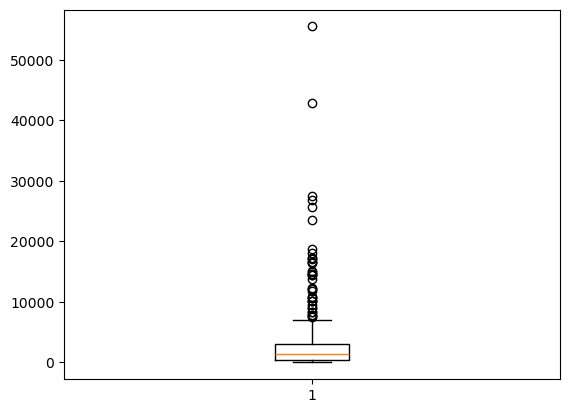

In [758]:
# plot the boxplot of Autumn column.
plt.boxplot(df['Autumn_total_sales'])
plt.show()

In [760]:
# the difference between the maximum and 99th percentile of Autumn sales
df['Autumn_total_sales'].max() - df['Autumn_total_sales'].quantile(0.99)


31571.600000000064

In [762]:
# Similarly finding the difference between the maximum and 99th percentile of summer, winter and spring total sales
df['Summer_total_sales'].max() - df['Summer_total_sales'].quantile(0.99)
df['Winter_total_sales'].max() - df['Winter_total_sales'].quantile(0.99)
df['Spring_total_sales'].max() - df['Spring_total_sales'].quantile(0.99)


4717.12

## Bivariate Analysis

### Lowest average rating for various categories of Price column

In [771]:
df.Rating.groupby(df.Price).mean()

Price
Average      3.464167
High         2.914286
Low          3.692121
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64

### Median of ratings for various categories of Style column

In [773]:
df.Rating.groupby(df.Style).median()

Style
Brief       4.60
Casual      4.60
Sexy        4.55
bohemian    4.60
cute        4.55
others      0.00
party       4.70
sexy        4.50
vintage     4.60
work        4.70
Name: Rating, dtype: float64

In [777]:
df.Recommendation.groupby(df.Season).mean()

Season
Autumn    0.333333
Spring    0.601695
Summer    0.344156
Winter    0.417266
Name: Recommendation, dtype: float64

### Average value of sales with positive recommendation in all the four season

<Axes: >

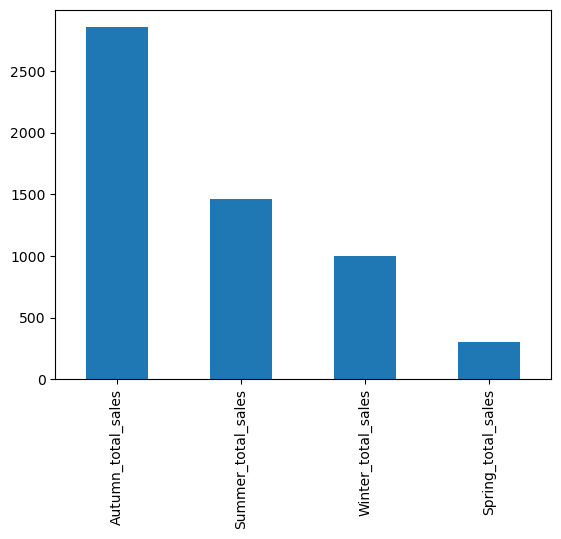

In [783]:

df[df.Recommendation==1][['Autumn_total_sales','Summer_total_sales','Winter_total_sales','Spring_total_sales']].mean(axis = 0).plot.bar()

### Average values of positive recommendation for Size categories

In [785]:
df.Recommendation.groupby(df.Size).mean()

Size
Extra Large    0.285714
Free           0.460606
Large          0.387097
Medium         0.444444
Small          0.361111
Name: Recommendation, dtype: float64

### Average values of positive recommendation for Style categories for each Price category

In [793]:
df.Recommendation.groupby([df.Style,df.Price]).mean()

Style     Price    
Brief     Average      0.333333
          Low          0.000000
Casual    Average      0.345455
          High         0.666667
          Low          0.382022
          Medium       0.666667
          very-high    0.500000
Sexy      Average      0.344828
          High         0.000000
          Low          0.515152
          Medium       0.000000
          very-high    0.000000
bohemian  Average      0.333333
          Low          0.666667
          Medium       1.000000
          very-high    1.000000
cute      Average      0.380952
          High         0.666667
          Low          0.500000
          Medium       1.000000
others    Average      0.375000
          Medium       0.500000
party     Average      0.666667
          High         0.333333
          Medium       0.800000
          very-high    0.823529
sexy      Average      0.500000
          Low          0.750000
          Medium       0.000000
vintage   Average      0.352941
          High      

### Material types with no recommendation can be obtained using pivot table

In [825]:
pd.pivot_table(data = df, index = "Material", columns = "Season", values = "Recommendation", aggfunc='mean')
pivot_table

Season,Autumn,Spring,Summer,Winter
Material,,,,
chiffonfabric,0.500000,0.600000,0.125000,0.000000
cotton,0.294118,0.576923,0.386667,0.517241
microfiber,NaN,1.000000,0.000000,0.000000
milksilk,1.000000,NaN,0.000000,0.000000
mix,NaN,0.500000,0.333333,0.200000
nylon,0.000000,0.333333,1.000000,0.333333
others,0.360000,0.641026,0.425000,0.473684
polyster,0.266667,0.571429,0.071429,0.360000
rayon,0.666667,1.000000,0.333333,NaN


In [823]:
# why NaN values, for example, for rayon-winter?
df.loc[df.Material=='rayon',['Season','Recommendation']]

,Season,Recommendation
40,Autumn,0
59,Spring,1
86,Autumn,1
275,Spring,1
309,Summer,1
310,Spring,1
355,Summer,0
402,Summer,0
422,Autumn,1
462,Spring,1


### Using heatmap tp plot mean of positive recommendation for each season and Material category

In [841]:
out1 = df.pivot_table(values = 'Recommendation', index = 'Season', columns = 'Material')

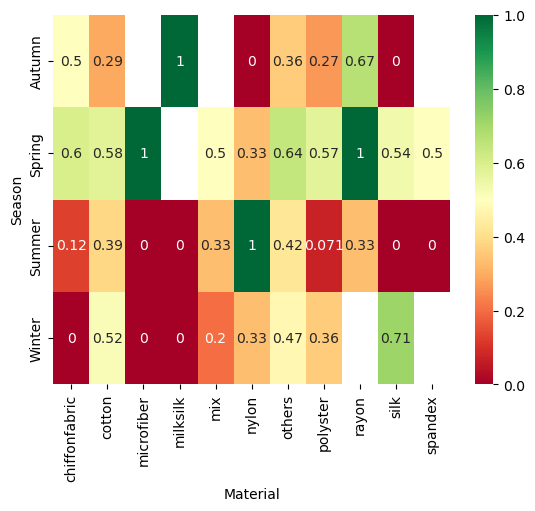

In [863]:
sns.heatmap(data = out1, annot = True, cmap = "RdYlGn")
plt.show()